In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression, RFE, SelectFromModel
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('car_prices.csv')
data.head()

,car_id,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Trim,Drivetrain,Seats,Number of Cylinders,Horse Power,Registered city
0,icwAaDOmX573WiRRnLFPT237,2812500,Petrol,Automatic,Toyota,Corolla,2004,Silver,Nigerian Used,251732.0,1800.0,Registered,Registered,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ByZ3NlPy2x0arAIyrKazClUS,5000000,Petrol,Automatic,Acura,MDX,2007,Green,Foreign Used,224589.0,3700.0,Imported,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
2,2zG6Mh3kwyoTvWoeKHkV1oFH,7592000,Petrol,Automatic,Acura,TL,2012,White,Foreign Used,111334.0,3500.0,Imported,Imported,Sedan,SH-AWD Automatic Tech Package,All Wheel,5.0,6.0,309.0,NaN
3,7APLHOPlI93qsYK0ST4D4wB2,9880000,Petrol,Automatic,Land Rover,Range Rover,2012,Gray,Nigerian Used,72682.0,4000.0,Registered,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
4,zIrIDPJLd46eRQf9JFacc0e,4160000,Petrol,Automatic,Ford,Edge,2013,Gray,Nigerian Used,92118.0,3500.0,Registered,Registered,SUV,NaN,NaN,NaN,NaN,NaN,Lagos


In [3]:
data.isna().sum()

car_id                    0
price                     0
fuel type                 1
gear type                 2
Make                      0
Model                     0
Year of manufacture       0
Colour                    5
Condition                 0
Mileage                  59
Engine Size              61
Selling Condition         0
Bought Condition          0
car                    1955
Trim                   2843
Drivetrain             2884
Seats                  2934
Number of Cylinders    2896
Horse Power            2967
Registered city        1821
dtype: int64

In [4]:
for col in data.columns:
    print(f'{col} : {len(data[col].unique())}')

car_id : 3120
price : 516
fuel type : 5
gear type : 4
Make : 50
Model : 325
Year of manufacture : 31
Colour : 19
Condition : 3
Mileage : 3032
Engine Size : 70
Selling Condition : 3
Bought Condition : 3
car : 16
Trim : 389
Drivetrain : 7
Seats : 7
Number of Cylinders : 5
Horse Power : 162
Registered city : 72


In [5]:
data['Drivetrain'].unique()

array([nan, 'All Wheel', 'Rear Wheel', 'Front', 'Front Wheel', '4x4',
       '4x2'], dtype=object)

In [6]:
for col in data[['fuel type', 'gear type', 'Drivetrain']].columns:
    unique_values = data[col].unique()
    data[col].fillna(unique_values[0], inplace=True)          

In [7]:
data['Drivetrain'].fillna('All Wheel', inplace=True)  

In [8]:
data['Seats'].fillna(np.round(data['Seats'].mean()), inplace=True)

In [9]:
data['Number of Cylinders'].fillna(5.0, inplace=True)

In [10]:
data['car'].fillna('Others', inplace=True)

In [11]:
data['Colour'].fillna('Others', inplace=True)

In [12]:
data['Engine Size'].fillna(round(data['Engine Size'].mean()), inplace=True)

In [13]:
data['Horse Power'].fillna(np.round(data['Horse Power'].mean()), inplace=True)

In [14]:
data['Mileage'].fillna(np.round(data['Mileage'].mean()), inplace=True)

In [15]:
data.drop(['car_id', 'Trim', 'Registered city', 'Model'], axis=1, inplace=True)

In [16]:
data.isna().sum()

price                  0
fuel type              0
gear type              0
Make                   0
Year of manufacture    0
Colour                 0
Condition              0
Mileage                0
Engine Size            0
Selling Condition      0
Bought Condition       0
car                    0
Drivetrain             0
Seats                  0
Number of Cylinders    0
Horse Power            0
dtype: int64

In [17]:
data.head()

,price,fuel type,gear type,Make,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Drivetrain,Seats,Number of Cylinders,Horse Power
0,2812500,Petrol,Automatic,Toyota,2004,Silver,Nigerian Used,251732.0,1800.0,Registered,Registered,Others,All Wheel,5.0,5.0,209.0
1,5000000,Petrol,Automatic,Acura,2007,Green,Foreign Used,224589.0,3700.0,Imported,Imported,SUV,All Wheel,5.0,5.0,209.0
2,7592000,Petrol,Automatic,Acura,2012,White,Foreign Used,111334.0,3500.0,Imported,Imported,Sedan,All Wheel,5.0,6.0,309.0
3,9880000,Petrol,Automatic,Land Rover,2012,Gray,Nigerian Used,72682.0,4000.0,Registered,Imported,SUV,All Wheel,5.0,5.0,209.0
4,4160000,Petrol,Automatic,Ford,2013,Gray,Nigerian Used,92118.0,3500.0,Registered,Registered,SUV,All Wheel,5.0,5.0,209.0


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [19]:
col_to_use = ['fuel type', 'gear type', 'Make', 'Colour', 'car', 'Condition', 'Selling Condition', 'Bought Condition', 'Drivetrain']

for col in data[col_to_use]:
    data[col] = le.fit_transform(data[col])

In [43]:
data.head()

,price,fuel type,gear type,Make,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Drivetrain,Seats,Number of Cylinders,Horse Power,Years
0,-0.396123,0.102294,-0.254403,0.988456,1.358159,0.567560,0.409837,-0.085761,0.567560,1.057181,-0.638435,-0.372973,-0.156471,-0.061263,0.001068,0.985786
1,0.112952,0.102294,-0.254403,-2.117384,0.008161,-1.751274,0.213808,-0.068204,-1.751274,-0.740365,0.713502,-0.372973,-0.156471,-0.061263,0.001068,0.272463
2,0.716162,0.102294,-0.254403,-2.117384,1.695658,-1.751274,-0.604127,-0.070052,-1.751274,-0.740365,1.614794,-0.372973,-0.156471,1.692755,3.132525,-0.916408
3,1.248625,0.102294,-0.254403,-0.597505,-0.160589,0.567560,-0.883274,-0.065431,0.567560,-0.740365,0.713502,-0.372973,-0.156471,-0.061263,0.001068,-0.916408
4,-0.082533,0.102294,-0.254403,-1.390485,-0.160589,0.567560,-0.742906,-0.070052,0.567560,1.057181,0.713502,-0.372973,-0.156471,-0.061263,0.001068,-1.154183


In [21]:
data['Years'] = [2024 - date for date in data['Year of manufacture']]
data.drop('Year of manufacture', axis=1, inplace=True)
data.head()

,price,fuel type,gear type,Make,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Drivetrain,Seats,Number of Cylinders,Horse Power,Years
0,2812500,3,0,47,15,2,251732.0,1800.0,2,2,7,2,5.0,5.0,209.0,20
1,5000000,3,0,0,7,1,224589.0,3700.0,1,1,10,2,5.0,5.0,209.0,17
2,7592000,3,0,0,17,1,111334.0,3500.0,1,1,12,2,5.0,6.0,309.0,12
3,9880000,3,0,23,6,2,72682.0,4000.0,2,1,10,2,5.0,5.0,209.0,12
4,4160000,3,0,11,6,2,92118.0,3500.0,2,2,10,2,5.0,5.0,209.0,11


In [22]:
data -= data.mean()

In [23]:
data /= data.std(axis=0)

In [80]:
X = data.drop(['price','gear type', 'Make','Number of Cylinders',], axis=1)
y = data.price

In [82]:
train_data = X[:3000]
train_label = y[:3000]

test_data = X[3000:]
test_label = y[3000:]

In [83]:
train_data.shape

(3000, 12)

In [81]:
# Recursive Feature Elimination (RFE)
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
X_selected = rfe.fit(X, y)
X_selected.support_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True])

In [84]:
from keras import models, layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu', input_shape=(X.shape[1],)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [85]:
num_epochs = 100
all_mae_histories = []
k = 5
num_val_samples = len(data) // k
print('Number of val sample', num_val_samples)

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_label[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_label[:i * num_val_samples], train_label[(i + 1) * num_val_samples:]], axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    

Number of val sample 744
processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


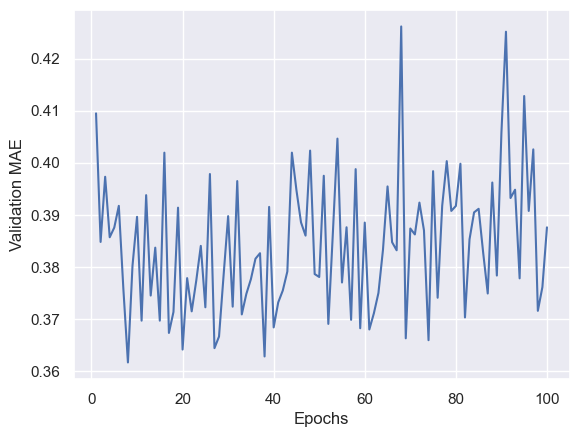

In [86]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()